In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("D:\My projects\CS\dataset for assignment 2.csv")

# Display dataset info
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   User ID                  5000 non-null   int64 
 1   Gender                   5000 non-null   object
 2   Age                      5000 non-null   int64 
 3   Activity Level           5000 non-null   object
 4   Location                 5000 non-null   object
 5   App Sessions             5000 non-null   int64 
 6   Distance Travelled (km)  5000 non-null   int64 
 7   Calories Burned          5000 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 312.6+ KB
None
   User ID  Gender  Age Activity Level  Location  App Sessions  \
0        1  Female   22         Active  Suburban           151   
1        2    Male   50         Active     Rural           157   
2        3    Male   36         Active     Urban           178   
3        4  Female   36         Active  Sub

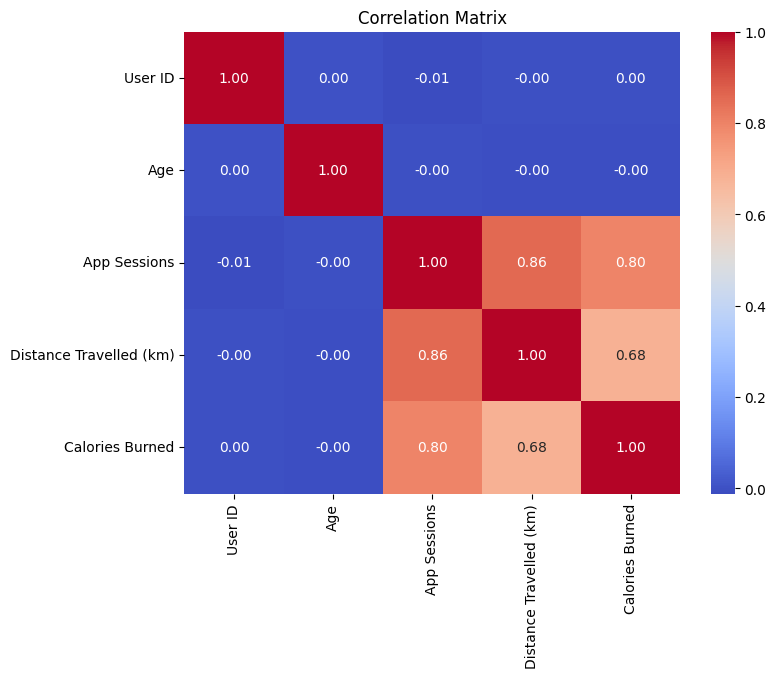

In [6]:
df_numeric = df.select_dtypes(include=['number'])  # Keep only numeric columns
correlation_matrix = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


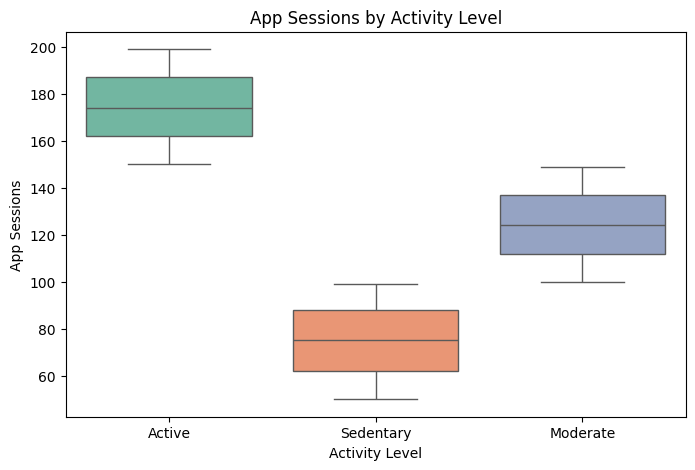

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example: Load your dataset
# df = pd.read_csv("your_dataset.csv")  # Ensure df is defined

# Create the plot
plt.figure(figsize=(8, 5))
sns.boxplot(x="Activity Level", y="App Sessions", hue="Activity Level", data=df, palette="Set2", legend=False)  # Updated line
plt.title("App Sessions by Activity Level")
plt.show()


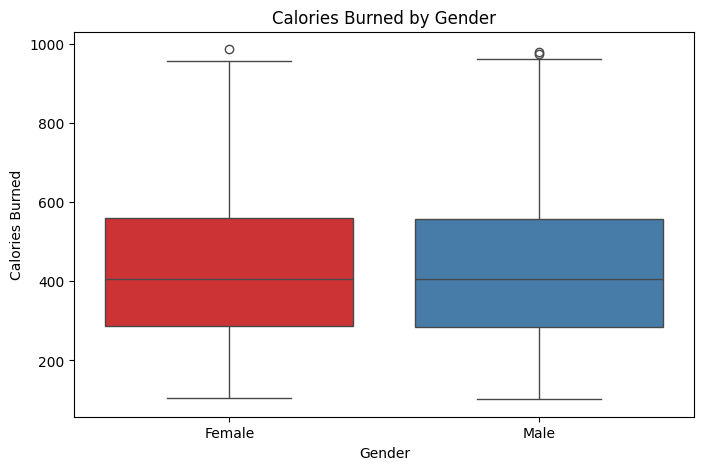

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example: Ensure df is defined
# df = pd.read_csv("your_dataset.csv")

plt.figure(figsize=(8, 5))
sns.boxplot(x="Gender", y="Calories Burned", hue="Gender", data=df, palette="Set1", legend=False)  # Updated line
plt.title("Calories Burned by Gender")
plt.show()


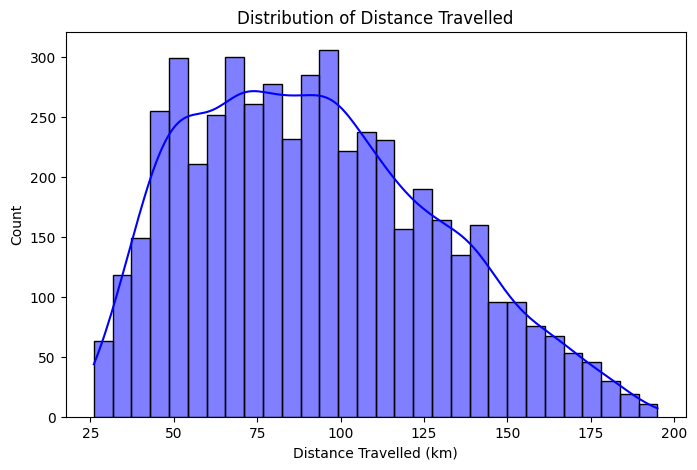

In [12]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Distance Travelled (km)"], bins=30, kde=True, color="blue")
plt.title("Distribution of Distance Travelled")
plt.xlabel("Distance Travelled (km)")
plt.show()


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Select features and target variable
X = df[["App Sessions", "Distance Travelled (km)"]]
y = df["Calories Burned"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Model evaluation
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")


Mean Absolute Error: 93.29078932500227
R² Score: 0.6385098652105219


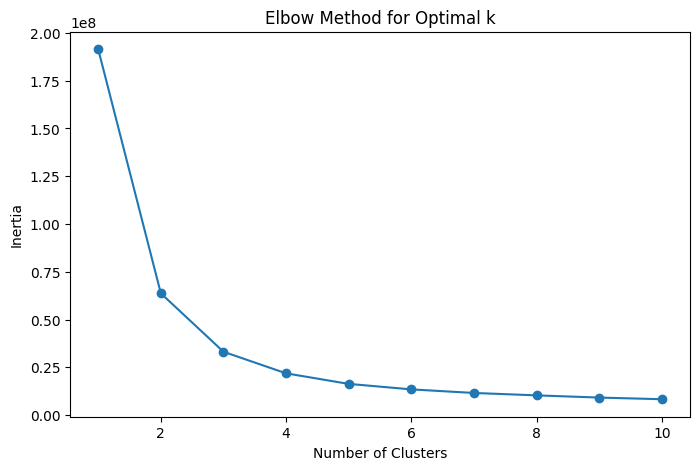

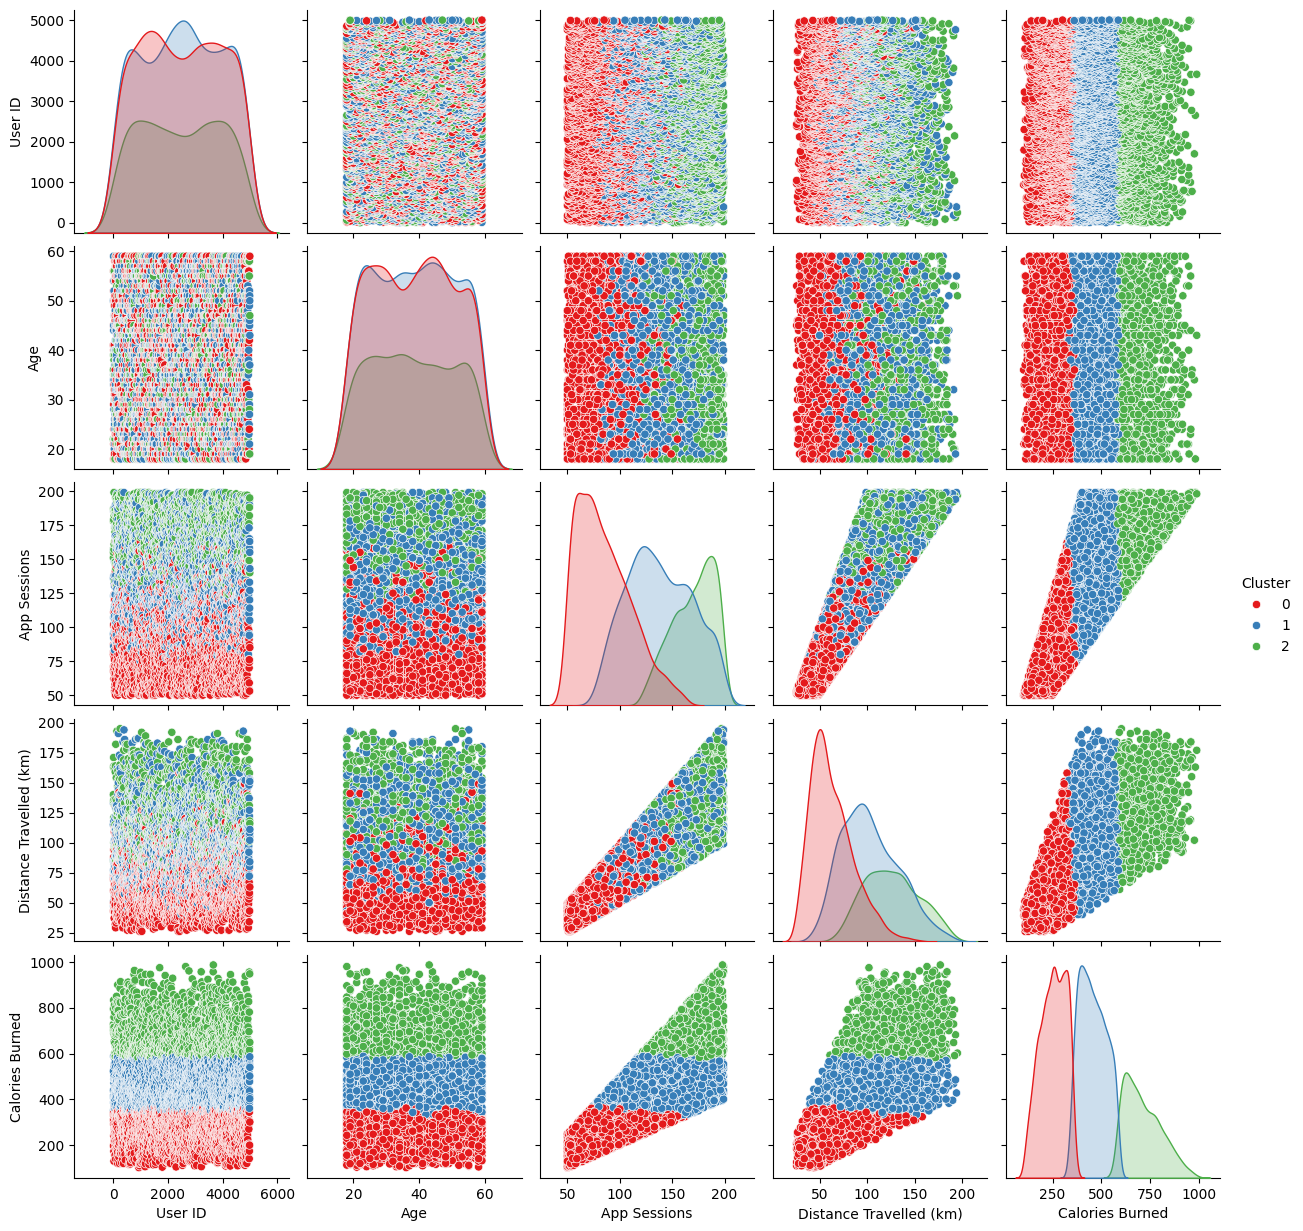

In [14]:
from sklearn.cluster import KMeans

# Select relevant numerical features
X_cluster = df[["App Sessions", "Distance Travelled (km)", "Calories Burned"]]

# Determine optimal k using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_cluster)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

# Train final KMeans model
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_cluster)

# Visualize clusters
sns.pairplot(df, hue="Cluster", palette="Set1", diag_kind="kde")
plt.show()
